In [1]:
import pandas as pd 
import ast 
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset ('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
import seaborn as sns


In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')


In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US = df_DA_US[['salary_year_avg', 'job_skills']]

In [5]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

In [6]:
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

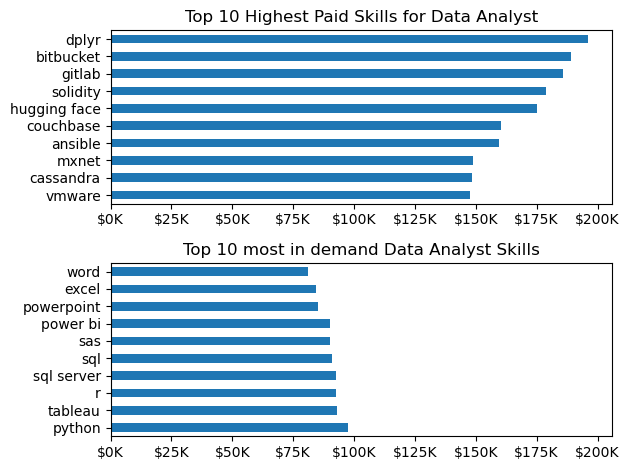

In [7]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 most in demand Data Analyst Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

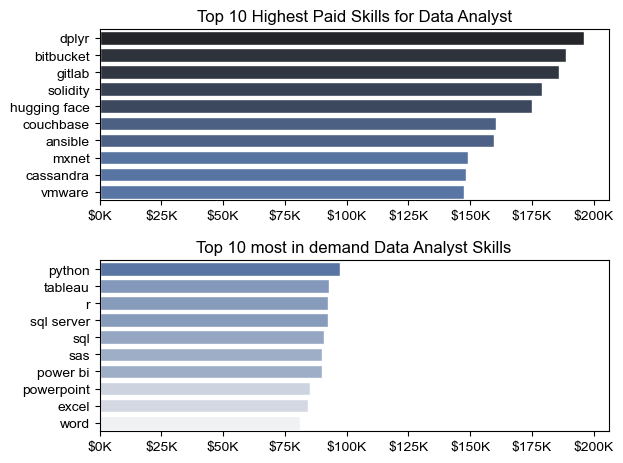

In [8]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)
# df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 most in demand Data Analyst Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

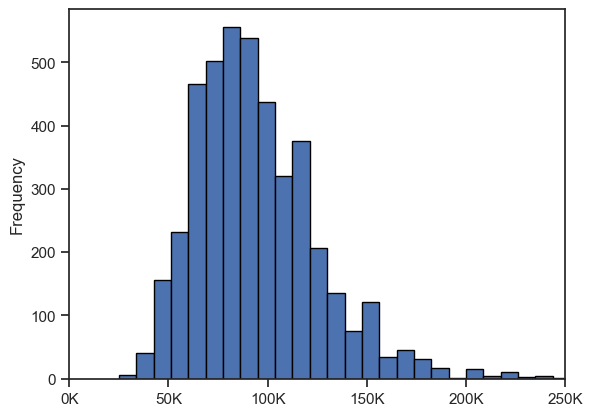

In [9]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['salary_year_avg'].plot(kind='hist', bins= 40, edgecolor= 'black')
plt.xlim(0,250_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

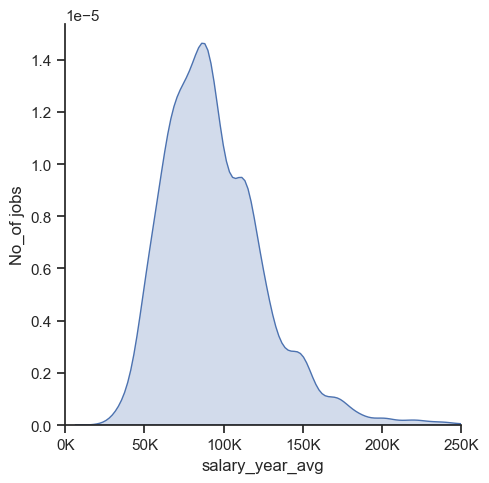

In [10]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0,250_000)
plt.ylabel('No_of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

/var/folders/_9/k43n03391fv7sbk8m_zv9xd40000gn/T/ipykernel_15520/1793068675.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


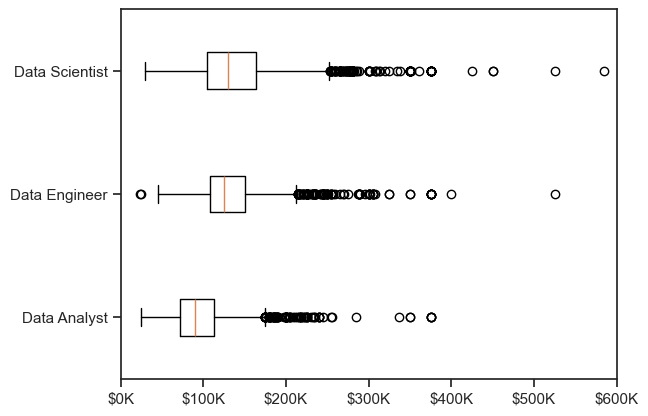

In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']   for job_title in job_titles]
plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()


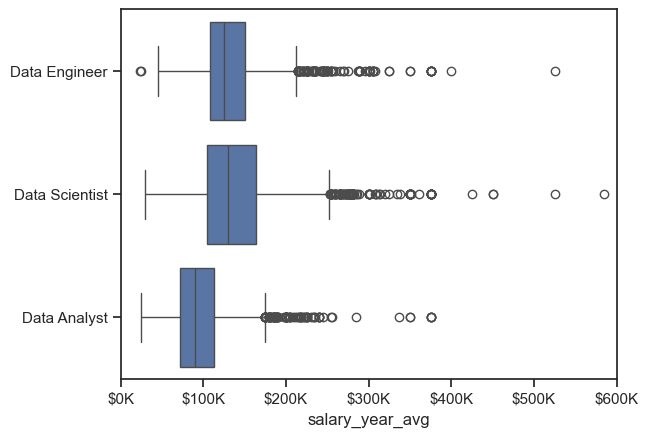

In [12]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']   for job_title in job_titles]
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.ylabel('')
plt.show()
